#### Project for Startup prediction

 Startups play a major role in economic growth. They bring new ideas, spur innovation, create employment thereby moving the economy. There has been an exponential growth in startups over the past few years.
 
 
 
Objective---
The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.




status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Data_Analysis_Visualisation\startup data.csv")

In [4]:
df.shape

(923, 49)

In [5]:
#we use properties of pandas to check the data clearly

pd.set_option('display.max_column',df.shape[1])
pd.set_option('display.max_row',df.shape[0])

In [6]:
df.head(2)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired


In [7]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [8]:
df=df.drop(columns=['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id','Unnamed: 6','state_code.1', 'is_CA','object_id'],axis=1)

In [9]:
df.shape

(923, 39)

In [10]:
df.head(2)

,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,Los Gatos,TriCipher,1,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city                      923 non-null    object 
 1   name                      923 non-null    object 
 2   labels                    923 non-null    int64  
 3   founded_at                923 non-null    object 
 4   closed_at                 335 non-null    object 
 5   first_funding_at          923 non-null    object 
 6   last_funding_at           923 non-null    object 
 7   age_first_funding_year    923 non-null    float64
 8   age_last_funding_year     923 non-null    float64
 9   age_first_milestone_year  771 non-null    float64
 10  age_last_milestone_year   771 non-null    float64
 11  relationships             923 non-null    int64  
 12  funding_rounds            923 non-null    int64  
 13  funding_total_usd         923 non-null    int64  
 14  milestones

In [12]:
#correcting the datatype of the column


for i in df.columns:
    if i in ['founded_at', 'closed_at','first_funding_at', 'last_funding_at']:
        df[i]=df[i].astype('datetime64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      923 non-null    object        
 1   name                      923 non-null    object        
 2   labels                    923 non-null    int64         
 3   founded_at                923 non-null    datetime64[ns]
 4   closed_at                 335 non-null    datetime64[ns]
 5   first_funding_at          923 non-null    datetime64[ns]
 6   last_funding_at           923 non-null    datetime64[ns]
 7   age_first_funding_year    923 non-null    float64       
 8   age_last_funding_year     923 non-null    float64       
 9   age_first_milestone_year  771 non-null    float64       
 10  age_last_milestone_year   771 non-null    float64       
 11  relationships             923 non-null    int64         
 12  funding_rounds        

In [14]:
#Checking the Missing values

df.isnull().sum()

city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_ange

In [15]:
#Selecting only year from the given columns so that we would be able to fill the missing values.


df['founded_at']=df['founded_at'].dt.year
df['closed_at']=df['closed_at'].dt.year
df['first_funding_at']=df['first_funding_at'].dt.year
df['last_funding_at']=df['last_funding_at'].dt.year

In [16]:
df.head()

,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,2007,NaN,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,Los Gatos,TriCipher,1,2000,NaN,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,San Diego,Plixi,1,2009,NaN,2010,2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,Cupertino,Solidcore Systems,1,2002,NaN,2005,2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,San Francisco,Inhale Digital,0,2010,2012.0,2010,2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


In [17]:
#Since age cannot be negative we are simply trying to remove all the negative values with 0

for i in df.columns:
    if i in ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']:
        df[i]=df[i].apply(lambda x:x if x>0 else 0)

In [18]:
df[['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']]

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year
0,2.2493,3.0027,4.6685,6.7041
1,5.1260,9.9973,7.0055,7.0055
2,1.0329,1.0329,1.4575,2.2055
3,3.1315,5.3151,6.0027,6.0027
4,0.0000,1.6685,0.0384,0.0384
5,4.5452,4.5452,5.0027,5.0027
6,1.7205,5.2110,3.0000,6.6082
7,1.6466,6.7616,5.6055,7.3616
8,3.5863,11.1123,8.0055,9.9945
9,1.6712,4.6849,2.9178,6.1151


In [19]:
# for i in df.columns:
#     if i in ['closed_at','age_first_milestone_year','age_last_milestone_year']:
#         df[i]=df[i].fillna(df[i].mean(),inplace=True)

In [20]:
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean(),inplace=True)

In [21]:
df.drop(columns=['closed_at'],inplace=True)

In [22]:
df.shape

(923, 38)

In [23]:
df.duplicated().sum()

1

In [24]:
#Dropping the Duplicate rows from the Dataframe

df.drop_duplicates()

,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,2007,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,Los Gatos,TriCipher,1,2000,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,San Diego,Plixi,1,2009,2010,2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,Cupertino,Solidcore Systems,1,2002,2005,2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,San Francisco,Inhale Digital,0,2010,2010,2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed
5,Mountain View,Matisse Networks,0,2002,2006,2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3.0000,1,closed
6,Mountain View,RingCube Technologies,1,2005,2006,2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1.6667,1,acquired
7,San Rafael,ClairMail,1,2004,2005,2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,3.5000,1,acquired
8,Williamstown,VoodooVox,1,2002,2005,2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,4.0000,1,acquired
9,Palo Alto,Doostang,1,2005,2007,2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1.0000,1,acquired


In [25]:
#Checking all the stasistical values of the Dataframe


df.describe().T

,count,mean,std,min,25%,50%,75%,max
labels,923.0,6.468039e-01,4.782221e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
founded_at,923.0,2.005496e+03,3.528738e+00,1984.0,2.003000e+03,2.006000e+03,2.008000e+03,2.013000e+03
first_funding_at,923.0,2.007476e+03,2.293583e+00,2000.0,2.006000e+03,2.007000e+03,2.009000e+03,2.013000e+03
last_funding_at,923.0,2.009161e+03,2.175327e+00,2001.0,2.008000e+03,2.009000e+03,2.011000e+03,2.013000e+03
age_first_funding_year,923.0,2.269952e+00,2.454950e+00,0.0,5.767000e-01,1.446600e+00,3.575350e+00,2.189590e+01
age_last_funding_year,923.0,3.947354e+00,2.930367e+00,0.0,1.669850e+00,3.528800e+00,5.560250e+00,2.189590e+01
age_first_milestone_year,923.0,2.624127e+00,2.816093e+00,0.0,0.000000e+00,2.000000e+00,4.002700e+00,2.468490e+01
age_last_milestone_year,923.0,3.997978e+00,3.378269e+00,0.0,1.000000e+00,3.783600e+00,6.039750e+00,2.468490e+01
relationships,923.0,7.710726e+00,7.265776e+00,0.0,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,923.0,2.310943e+00,1.390922e+00,1.0,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01


In [26]:
#Checking the correlation in the numerical columns


df.corr()

,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
labels,1.000000,-0.031645,-0.129485,0.050697,-0.092028,0.067870,0.257386,0.359238,0.360434,0.206049,0.040176,0.328260,0.059996,0.081735,-0.045309,-0.169067,0.012429,-0.000873,0.007312,0.073772,0.044355,-0.025893,-0.072193,0.000104,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652
founded_at,-0.031645,1.000000,0.732651,0.574230,-0.763184,-0.795552,-0.479340,-0.409408,0.016476,-0.094448,-0.059259,0.199491,0.174781,-0.101139,-0.041038,-0.025340,-0.186629,0.153693,0.041507,0.083978,0.034650,0.052223,0.129807,-0.141677,-0.029623,-0.072842,-0.175854,0.424782,0.120607,-0.202364,-0.255584,-0.266264,-0.087206,-0.155355
first_funding_at,-0.129485,0.732651,1.000000,0.628924,-0.143394,-0.436773,-0.336178,-0.377457,-0.164988,-0.302073,-0.033181,0.008381,0.144656,-0.144522,-0.027160,0.054643,-0.166203,0.065789,0.000719,0.084550,-0.012251,0.010798,0.125512,-0.025521,-0.061670,0.007343,-0.098966,0.312701,-0.121072,-0.383507,-0.361440,-0.283604,-0.023264,-0.198862
last_funding_at,0.050697,0.574230,0.628924,1.000000,-0.263302,0.019815,-0.072452,-0.079597,0.146995,0.377699,0.072526,0.182290,0.104544,-0.037275,-0.047296,-0.003521,-0.152362,-0.040163,0.085940,0.149961,-0.007980,-0.022465,0.073564,0.014581,-0.004240,-0.001179,0.177956,0.246009,0.070062,0.009760,0.007418,-0.019715,0.015181,0.004328
age_first_funding_year,-0.092028,-0.763184,-0.143394,-0.263302,1.000000,0.755921,0.380460,0.229193,-0.195097,-0.161961,0.045977,-0.304118,-0.121664,0.022916,0.032331,0.082692,0.113719,-0.165560,-0.054897,-0.047954,-0.058521,-0.066596,-0.075532,0.192227,-0.013680,0.113189,0.171521,-0.342829,-0.307696,-0.067114,0.031228,0.119491,0.107496,0.036926
age_last_funding_year,0.067870,-0.795552,-0.436773,0.019815,0.755921,1.000000,0.537992,0.437901,0.071947,0.386045,0.117200,-0.125861,-0.136474,0.095852,0.013972,0.029833,0.115775,-0.219714,0.009691,0.005395,-0.045652,-0.080160,-0.110959,0.191158,0.029783,0.091383,0.353333,-0.353762,-0.106063,0.257885,0.318907,0.314535,0.119627,0.192513
age_first_milestone_year,0.257386,-0.479340,-0.336178,-0.072452,0.380460,0.537992,1.000000,0.827394,0.318162,0.204685,0.064382,0.210274,-0.067639,0.066376,-0.009396,-0.039333,0.104907,-0.043246,-0.004538,0.046342,0.007559,-0.069495,-0.073596,-0.010394,0.038087,-0.018580,0.086639,-0.195383,0.064248,0.193212,0.166321,0.229294,0.046736,0.149706
age_last_milestone_year,0.359238,-0.409408,-0.377457,-0.079597,0.229193,0.437901,0.827394,1.000000,0.413602,0.256711,0.087062,0.546554,-0.048445,0.055112,-0.012685,-0.079285,0.032779,0.037821,0.052070,0.043842,0.018556,-0.023149,-0.080288,-0.073177,0.019773,-0.055453,0.045713,-0.146132,0.169971,0.252307,0.207105,0.213494,0.069963,0.209189
relationships,0.360434,0.016476,-0.164988,0.146995,-0.195097,0.071947,0.318162,0.413602,1.000000,0.358883,0.093790,0.513835,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,0.206049,-0.094448,-0.302073,0.377699,-0.161961,0.386045,0.204685,0.256711,0.358883,1.000000,0.115800,0.230162,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345


In [27]:
df.head(2)

,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,2007,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,Los Gatos,TriCipher,1,2000,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired


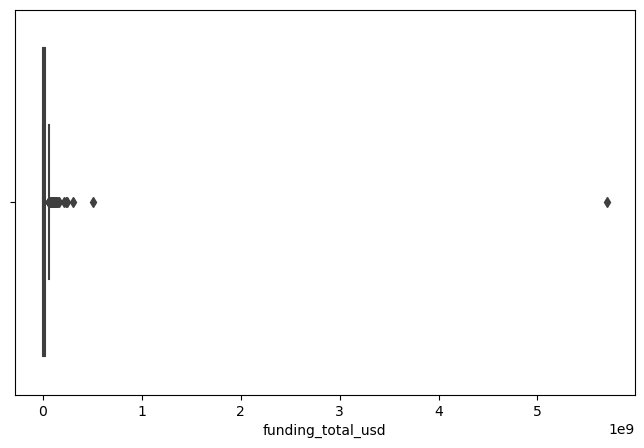

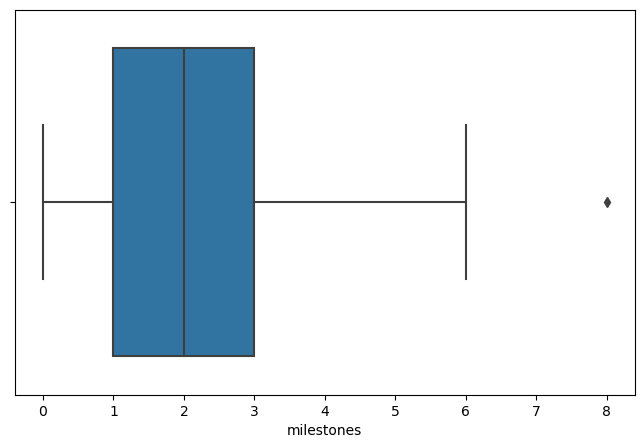

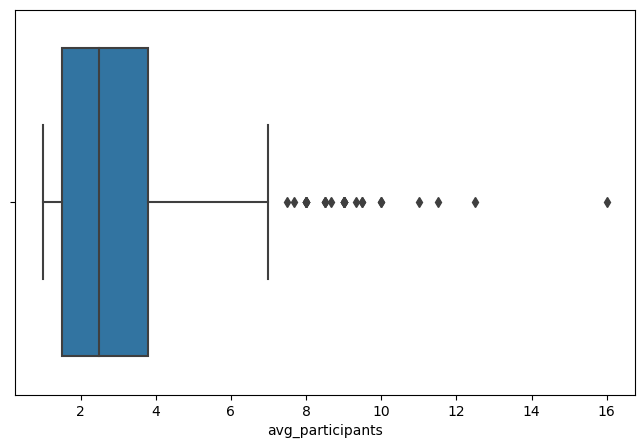

In [28]:
for i in df.columns:
    if i in ['funding_total_usd','milestones','avg_participants']:
        plt.figure(figsize=(8,5))
        sns.boxplot(df[i])

In [29]:
df.head(2)

,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,2007,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,Los Gatos,TriCipher,1,2000,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired


<AxesSubplot:xlabel='count', ylabel='city'>

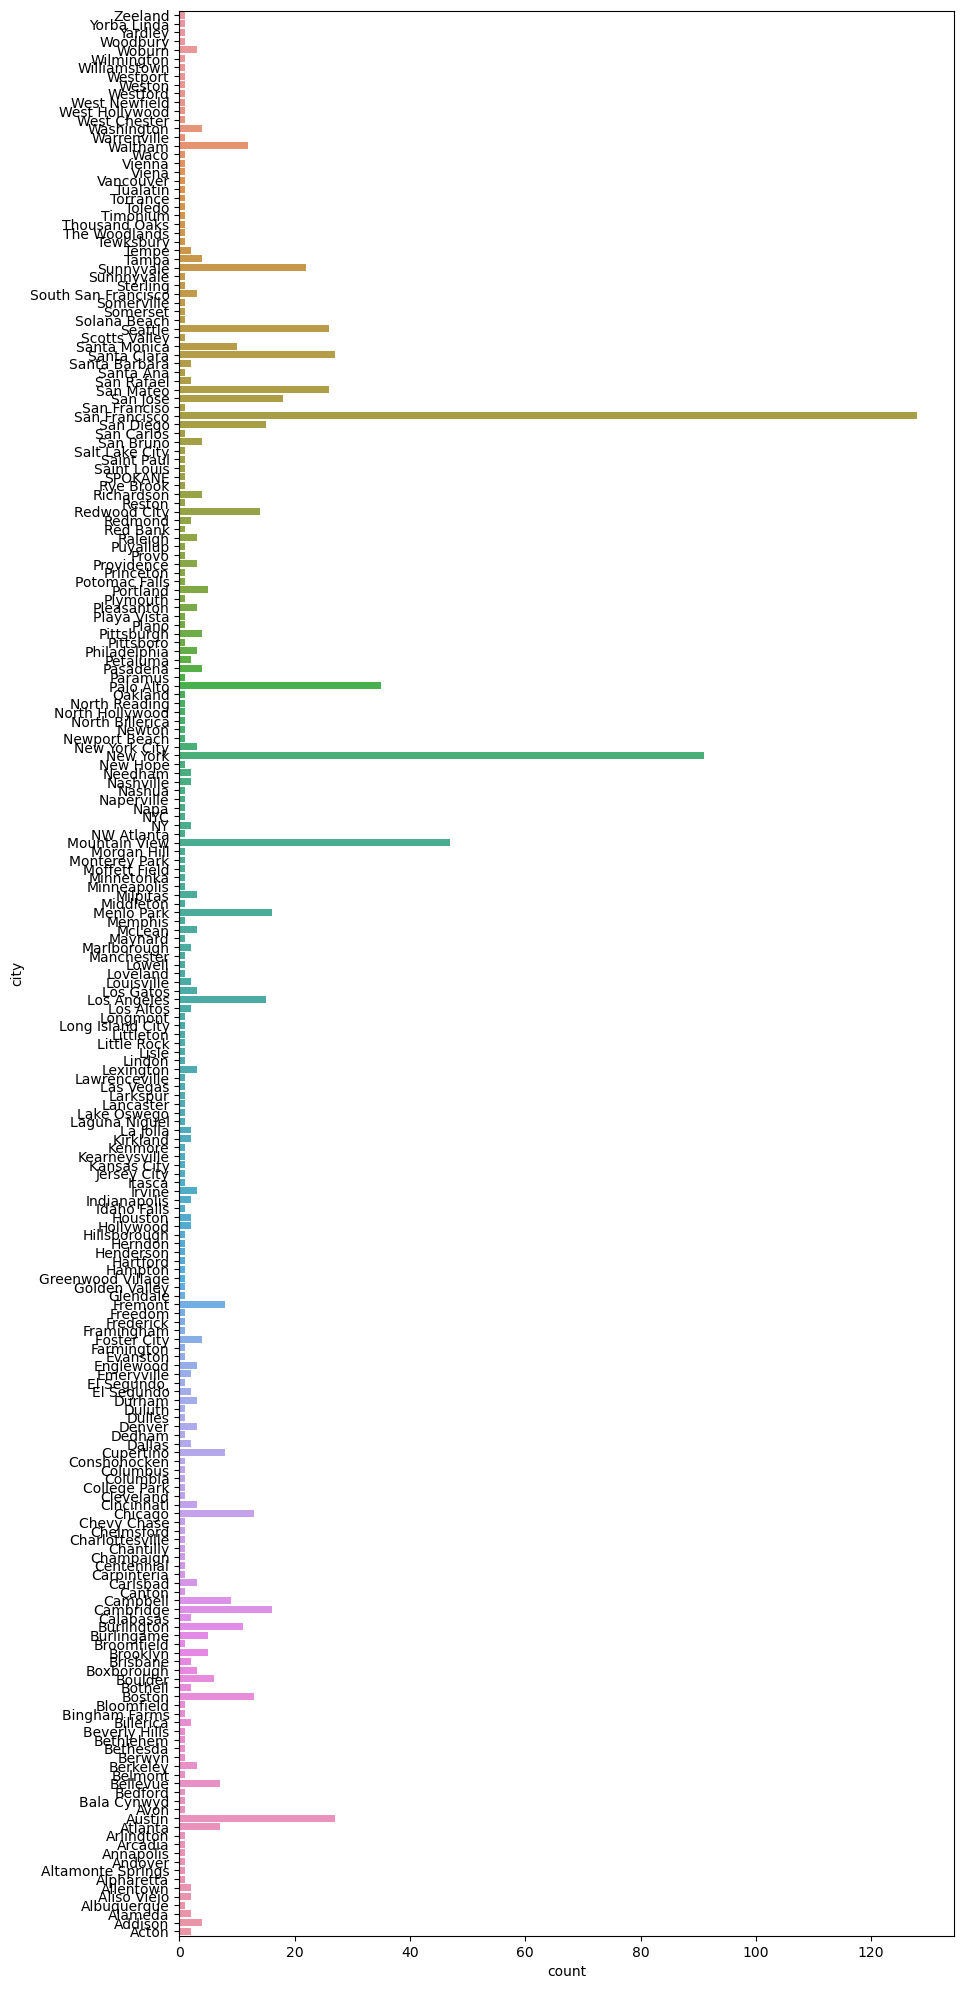

In [48]:
#Top 10  cities having maximum startups



plt.figure(figsize=(10,25))
sns.countplot(y=df['city'])

<AxesSubplot:xlabel='founded_at'>

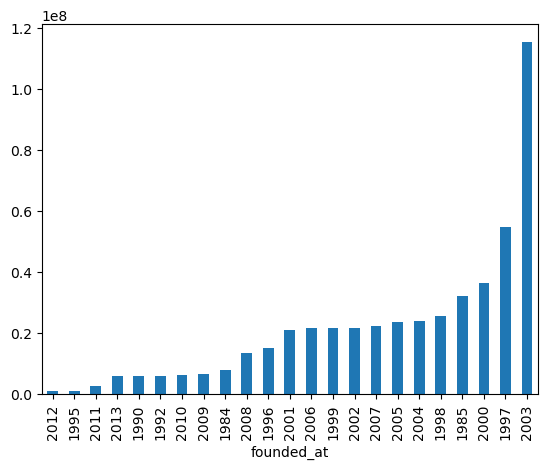

In [31]:
#All startups with average funding yearwise in USD

df.groupby('founded_at').mean()['funding_total_usd'].round().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='funding_total_usd', ylabel='category_code'>

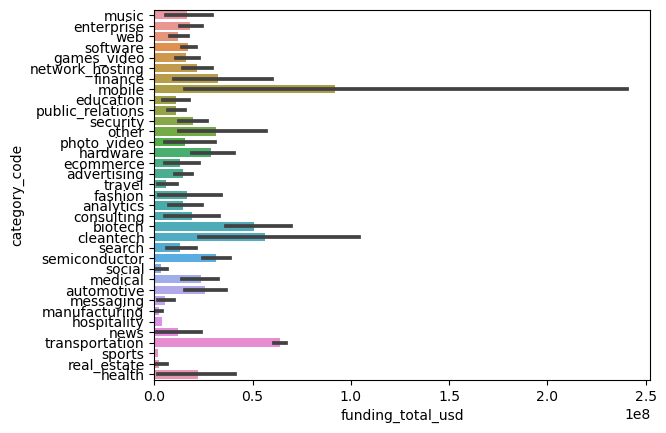

In [32]:
sns.barplot(y='category_code',x='funding_total_usd',data=df)

In [33]:
df.head(2)

,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,2007,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,Los Gatos,TriCipher,1,2000,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired


<AxesSubplot:xlabel='founded_at', ylabel='funding_total_usd'>

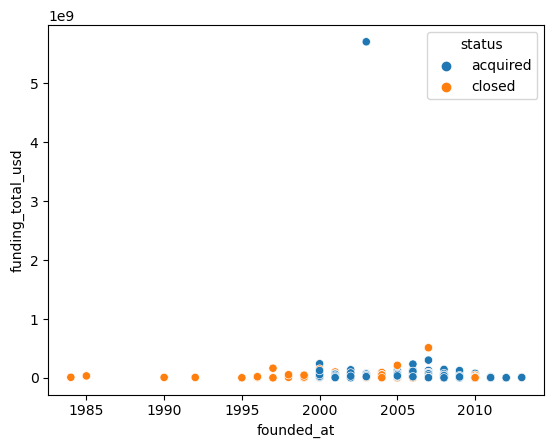

In [34]:
#Yearwise total funding with their status whether it got acquired or closed

sns.scatterplot(x='founded_at',y='funding_total_usd',hue='status',data=df)

In [35]:
df.head(2)

,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,2007,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,Los Gatos,TriCipher,1,2000,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired


In [62]:
# List of top 10 startup_names which had got the maximum funding_rounds


p=df.groupby('name')['funding_rounds'].count().sort_values(ascending=False)[0:10]

<AxesSubplot:ylabel='funding_rounds'>

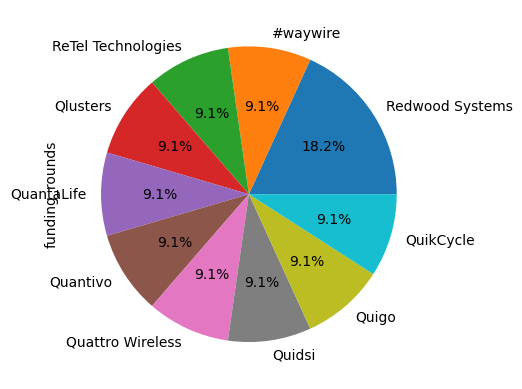

In [63]:
p.plot(kind='pie',autopct='%0.1f%%')

In [64]:
df.head(2)

,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1,2007,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,Los Gatos,TriCipher,1,2000,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired


In [66]:
df.columns

Index(['city', 'name', 'labels', 'founded_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_NY', 'is_MA',
       'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web',
       'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
       'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')